# Data Mining practice and reference

The methods are applied on income dataset downloaded from:

https://www.kaggle.com/ahmettezcantekin/beginner-datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import math
import missingno as msno # for missing value visualizations
from typing import List # for typing hints
import collections # for ordered dict
import itertools # for combinations

## Initial exploration

In [2]:
df = pd.read_csv('data/income.csv')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
education_dict = {x['education-num']:x['education'] for i, x in df.iterrows()}
education_dict_ordered = collections.OrderedDict(sorted(education_dict.items()))
education_dict_ordered

OrderedDict([(1, 'Preschool'),
             (2, '1st-4th'),
             (3, '5th-6th'),
             (4, '7th-8th'),
             (5, '9th'),
             (6, '10th'),
             (7, '11th'),
             (8, '12th'),
             (9, 'HS-grad'),
             (10, 'Some-college'),
             (11, 'Assoc-voc'),
             (12, 'Assoc-acdm'),
             (13, 'Bachelors'),
             (14, 'Masters'),
             (15, 'Prof-school'),
             (16, 'Doctorate')])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


## Data Preprocessing

Casting to correct data types.

In [5]:
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['income >50K'] = df['income >50K'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  31978 non-null  category
 13  income >50K     32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [6]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Handling missing data

In [7]:
df.isnull().values.any()

True

In [8]:
s = df.isnull().sum()
s[s != 0] # columns with missing values and how many missing values they contain

workclass         1836
occupation        1843
native-country     583
dtype: int64

In [9]:
len(df.index) # record count

32561

In [10]:
s[s != 0] / len(df.index) # missing values relative to all values

workclass         0.056386
occupation        0.056601
native-country    0.017905
dtype: float64

All columns containing missing values are categorical. The highest missing value column is the workclass column with around 5.6% of values missing. Work class and occupation show almost equal amount of null values, hence further exploration is carried out.

<AxesSubplot:>

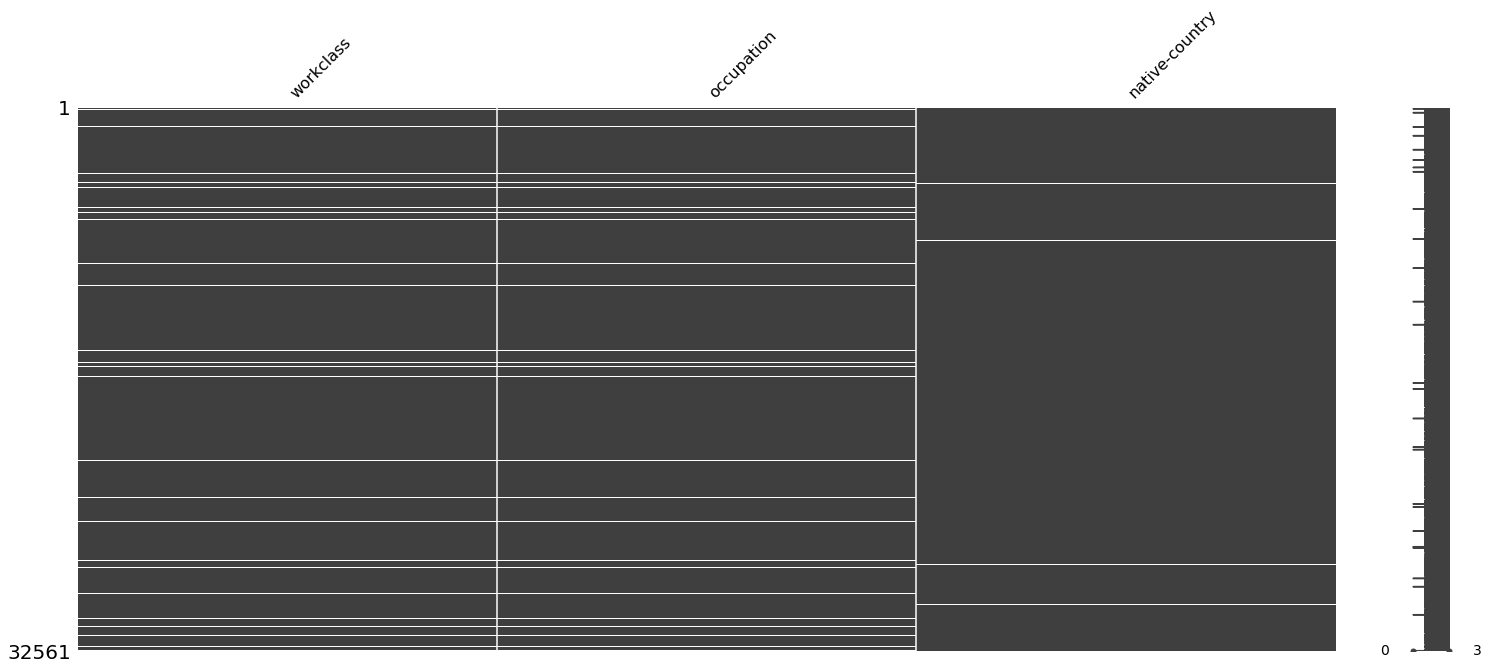

In [11]:
msno.matrix(df[s[s != 0].index])

The above plot shows that values in columns work class and occupation are missing in similar places. Occupation has seven more values than work class. The occupation commonly determines one's work class; it can be therefore assumed that there is a strong correlation between the two columns; therefore, some missing values may be inferred. Since the missing values are around 5%, argument can be made for removing those values from the analysis.

In [12]:
df[(df['workclass'].notnull()) & (df['occupation'].isnull())][['workclass', 'occupation']]

,workclass,occupation
5361,Never-worked,NaN
10845,Never-worked,NaN
14772,Never-worked,NaN
20337,Never-worked,NaN
23232,Never-worked,NaN
32304,Never-worked,NaN
32314,Never-worked,NaN


Further investigation shows, that **all Never-worked workclass has stated no occupation**, which makes sense. The categories take into account self-employment and enterprenurial optionsmissing values in occupation can be replaced by 'unemployed.'

In [13]:
try: 
    df['occupation'] = df['occupation'].cat.add_categories(['unemployed'])
    df.loc[(df['workclass'].notnull()) & (df['occupation'].isnull()), 'occupation'] = 'unemployed'
except ValueError as e:
    pass
df[(df['workclass'].notnull()) & (df['occupation'] == 'unemployed')] 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
5361,18,Never-worked,10th,6,Never-married,unemployed,Own-child,White,Male,0,0,40,United-States,0
10845,23,Never-worked,7th-8th,4,Divorced,unemployed,Not-in-family,White,Male,0,0,35,United-States,0
14772,17,Never-worked,10th,6,Never-married,unemployed,Own-child,White,Male,0,0,30,United-States,0
20337,18,Never-worked,11th,7,Never-married,unemployed,Own-child,White,Female,0,0,10,United-States,0
23232,20,Never-worked,Some-college,10,Never-married,unemployed,Own-child,Black,Male,0,0,40,United-States,0
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,unemployed,Wife,Black,Female,0,0,40,United-States,0
32314,18,Never-worked,Some-college,10,Never-married,unemployed,Own-child,White,Male,0,0,4,United-States,0


The above table shows the result of replacement. All unemployed people put some working hours per week, majority almost a full working week. Looking at eductaion and age, this can be explained by ongoing studies, or parent leave. Id **10845** put 35 hours per week, albeit unemployed, not in family and not ongoing education. One possible explanation of this the divorced marital status, if the individual has custody over his children.

In [14]:
# pd.qcut(df['hours-per-week'], q=4)
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

<AxesSubplot:title={'center':'occupation'}>

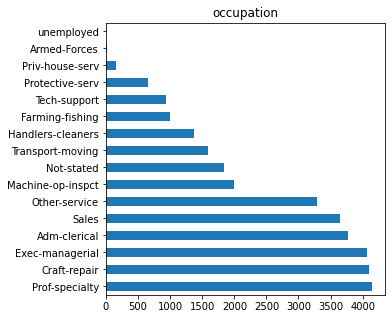

In [15]:
try:
    df['occupation'] = df['occupation'].cat.add_categories(['Not-stated'])
    df['occupation'] = df['occupation'].fillna('Not-stated')
except ValueError as e:
    pass
df['occupation'].value_counts().plot.barh(title='occupation', figsize=(5, 5)) # bar chart for exploration

<AxesSubplot:title={'center':'work class'}>

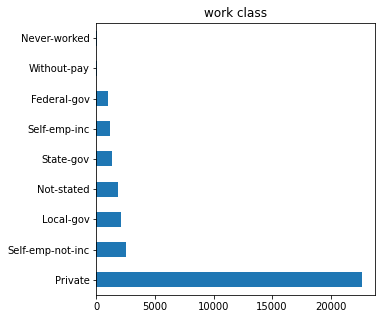

In [16]:
try:
    df['workclass'] = df['workclass'].cat.add_categories(['Not-stated'])
    df['workclass'] = df['workclass'].fillna('Not-stated')
except ValueError as e:
    pass
display(df['workclass'].fillna('Not-stated').value_counts().plot.barh(title='work class', figsize=(5, 5)))

## Market Basket Analysis
Exploring factor combinations linked to > 50K year income.

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

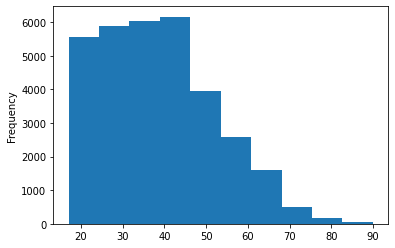

In [17]:
display(df['age'].describe())
display(df['age'].plot.hist())

In [18]:
def age_categorize(age: int) -> str:
    if age < 25:
        return '-25'
    if 25 <= age <= 30:
        return '25-30'
    if 31 <= age <= 40:
        return '31-40'
    if 41 <= age <= 50:
        return '41-50'
    if 51 <= age <= 60:
        return '51-60'
    if 61 <= age:
        return '61+'

df['age-category'] = df['age'].apply(age_categorize)
df['age-category'] = df['age-category'].astype('category')

Native country feature will not be selected. The visualization below suggests that natives other than US will not get sufficient support.

<AxesSubplot:>

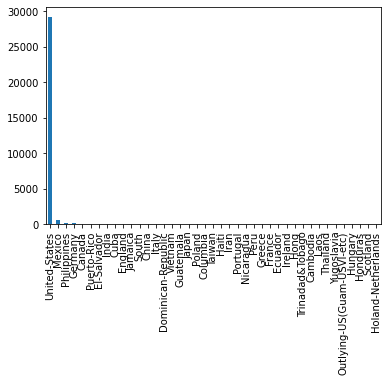

In [19]:
df['native-country'].value_counts().plot.bar()

In [20]:
basket_df = pd.get_dummies(df[['age-category', 'marital-status', 'race', 'sex', 'income >50K', 'occupation', 'workclass']])
basket_df = basket_df.rename(columns={'income >50K_0': 'income <50K', 'income >50K_1': 'income >50K'})
basket_df = basket_df.drop(['workclass_Not-stated', 'occupation_Not-stated'], axis=1)
display(basket_df.isnull().values.any())
display(basket_df.head())

False

,age-category_-25,age-category_25-30,age-category_31-40,age-category_41-50,age-category_51-60,age-category_61+,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,occupation_Transport-moving,occupation_unemployed,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
basket_df['capital-gain'] = df['capital-gain'].apply(lambda x: 1 if x > 0 else 0)
basket_df['capital-loss'] = df['capital-loss'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
df['education'].cat.categories

Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')

In [23]:
education_dict_ordered

OrderedDict([(1, 'Preschool'),
             (2, '1st-4th'),
             (3, '5th-6th'),
             (4, '7th-8th'),
             (5, '9th'),
             (6, '10th'),
             (7, '11th'),
             (8, '12th'),
             (9, 'HS-grad'),
             (10, 'Some-college'),
             (11, 'Assoc-voc'),
             (12, 'Assoc-acdm'),
             (13, 'Bachelors'),
             (14, 'Masters'),
             (15, 'Prof-school'),
             (16, 'Doctorate')])

In [24]:
basic_edu = [v for k, v in education_dict_ordered.items() if k < 10]
higher_edu = [v for k, v in education_dict_ordered.items() if k >= 10 and k < 14]
university_edu = [v for k, v in education_dict_ordered.items() if k >= 14]
university_edu

['Masters', 'Prof-school', 'Doctorate']

In [25]:
basket_df['education_Basic'] = df['education'].apply(lambda x: 1 if x in basic_edu else 0)
basket_df['education_Higher'] = df['education'].apply(lambda x: 1 if x in higher_edu else 0)
basket_df['education_University'] = df['education'].apply(lambda x: 1 if x in university_edu else 0)
basket_df[['education_Basic', 'education_Higher', 'education_University']].head()

,education_Basic,education_Higher,education_University
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [26]:
basket_df.head()

,age-category_-25,age-category_25-30,age-category_31-40,age-category_41-50,age-category_51-60,age-category_61+,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,capital-gain,capital-loss,education_Basic,education_Higher,education_University
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [27]:
def union(df, *itemset) -> pd.DataFrame:
    tmp_df = pd.DataFrame()
    tmp_df['conj'] = df[itemset[0]]
    for item in itemset:
        tmp_df['conj'] *= df[item]
    return tmp_df['conj']

union(basket_df, 'age-category_-25', 'sex_Male')

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    1
32560    0
Name: conj, Length: 32561, dtype: uint8

In [28]:
def support(df, *itemset) -> float:
    """
    frequency of conjunction of given items
    
    features: list(str)
    df: pandas.DataFrame
    return: float
    """
    return sum(union(df, *itemset))/len(df.index)

# test
support(basket_df, 'age-category_-25') == basket_df['age-category_-25'].sum()/basket_df['age-category_-25'].count()

True

In [29]:
def confidence(df, X: List[str], Y: List[str]) -> float:
    """
    likelihood of Y given X
    X: itemset
    Y: itemset
    """
    return support(df, *[*X, *Y])/support(df, *X)

confidence(basket_df, ['age-category_-25'], ['income >50K'])

0.01095152603231598

In [30]:
def lift(df, X: List[str], Y: List[str]) -> float:
    """
    likelihood of Y given X, taking into account the frequency of Y
    """
    return support(df, *[*X, *Y])/(support(df, *X) * support(df, *Y))
    

lift(basket_df, ['race_White'], ['income >50K'])

1.0624990944739086

In [31]:
supp_threshold = 0.05

# steap 1-2
frequencies = basket_df.sum()/len(basket_df.index) # support table
frequencies = frequencies[frequencies > supp_threshold] # filter threshold
frequencies

age-category_-25                     0.171064
age-category_25-30                   0.153619
age-category_31-40                   0.262461
age-category_41-50                   0.214459
age-category_51-60                   0.126777
age-category_61+                     0.071619
marital-status_Divorced              0.136452
marital-status_Married-civ-spouse    0.459937
marital-status_Never-married         0.328092
race_Black                           0.095943
race_White                           0.854274
sex_Female                           0.330795
sex_Male                             0.669205
income <50K                          0.759190
income >50K                          0.240810
occupation_Adm-clerical              0.115783
occupation_Craft-repair              0.125887
occupation_Exec-managerial           0.124873
occupation_Machine-op-inspct         0.061485
occupation_Other-service             0.101195
occupation_Prof-specialty            0.127146
occupation_Sales                  

In [32]:
# step 3 create combination pairs
itemset = [*itertools.combinations(frequencies.index, 2)]
itemset[0:5]

[('age-category_-25', 'age-category_25-30'),
 ('age-category_-25', 'age-category_31-40'),
 ('age-category_-25', 'age-category_41-50'),
 ('age-category_-25', 'age-category_51-60'),
 ('age-category_-25', 'age-category_61+')]

In [33]:
freqs = pd.Series(data= [support(basket_df, *x) for x in itemset], index=itemset)
freqs

(age-category_-25, age-category_25-30)      0.000000
(age-category_-25, age-category_31-40)      0.000000
(age-category_-25, age-category_41-50)      0.000000
(age-category_-25, age-category_51-60)      0.000000
(age-category_-25, age-category_61+)        0.000000
                                              ...   
(capital-gain, education_Higher)            0.040601
(capital-gain, education_University)        0.015325
(education_Basic, education_Higher)         0.000000
(education_Basic, education_University)     0.000000
(education_Higher, education_University)    0.000000
Length: 406, dtype: float64

In [34]:
def apriori_rules(df: pd.DataFrame, threshold: int, ceiling=math.inf):
    r = 2
    frequencies = pd.Series(data=[support(df, x) for x in df.columns], index=df.columns)
    frequencies = frequencies[frequencies > threshold] # filter threshold
    items = {x for x in frequencies.index}
    itemset = {frozenset(x) for x in itertools.combinations(items, r)}
    rules = pd.Series(data= [support(df, *x) for x in itemset], index=itemset, dtype='float64')
    rules = rules[rules > threshold]
    r += 1
    check_subsets = set()
    while r < ceiling:
        print(r, end='\r')
        itemset = {frozenset(x) for x in itertools.combinations(items, r) if not any([a.issubset(frozenset(x)) for a in check_subsets])}
        new_rules = pd.Series(dtype='float64')
        check_subsets = set()
        items = set()
        for x in itemset:
            supp = support(df, *x)
            if supp > threshold:
                items = items.union(x)
                new_rules = new_rules.append(pd.Series([supp], index=[x]))
            else:
                check_subsets.add(x)      
        if len(new_rules) == 0:
            return rules
        rules = rules.append(new_rules)
        r += 1
    print(end='\n')
    return rules
    

In [35]:
rules = apriori_rules(basket_df, 0.05)
len(rules)

635

In [36]:
income_indices_over50k = [x for x in rules.index if 'income >50K' in x]
income_indices_under50k = [x for x in rules.index if 'income <50K' in x]
len(income_indices_over50k), len(income_indices_under50k)

(60, 243)

In [37]:
income_indices_over50k[0].difference(['income >50K'])

lift_over50k = pd.DataFrame(data = { 'lift': [lift(basket_df, x.difference(['income >50K']), ['income >50K']) for x in income_indices_over50k], 'confidence': [confidence(basket_df, x.difference(['income >50K']), ['income >50K']) for x in income_indices_over50k], 'support': [support(basket_df, *x) for x in income_indices_over50k]}, index=income_indices_over50k)
lift_under50k = pd.DataFrame(data = { 'lift': [lift(basket_df, x.difference(['income <50K']), ['income <50K']) for x in income_indices_under50k], 'confidence':  [confidence(basket_df, x.difference(['income <50K']), ['income <50K']) for x in income_indices_under50k], 'support': [support(basket_df, *x) for x in income_indices_under50k]}, index=income_indices_under50k)

## Results and interpretation

In [41]:
lift_over50k.sort_values(['lift', 'confidence', 'support'], ascending=[False, False, False]).head(5)

,lift,confidence,support
"(marital-status_Married-civ-spouse, income >50K, occupation_Exec-managerial)",2.830741,0.681669,0.051166
"(income >50K, education_University)",2.584693,0.622419,0.051841
"(income >50K, capital-gain)",2.567850,0.618363,0.051503
"(sex_Male, income >50K, occupation_Exec-managerial)",2.411314,0.580667,0.051841
"(income >50K, sex_Male, age-category_41-50, marital-status_Married-civ-spouse, race_White)",2.316760,0.557898,0.057707


In [42]:
lift_under50k.sort_values(['lift', 'confidence', 'support'], ascending=[False, False, False]).head(5)

,lift,confidence,support
"(education_Basic, marital-status_Never-married, income <50K, age-category_-25, workclass_Private, race_White)",1.316415,0.999410,0.051995
"(education_Basic, marital-status_Never-married, income <50K, age-category_-25, workclass_Private)",1.315855,0.998984,0.060410
"(sex_Female, marital-status_Never-married, income <50K, age-category_-25, race_White)",1.315137,0.998439,0.058936
"(education_Basic, marital-status_Never-married, income <50K, age-category_-25, race_White)",1.314574,0.998012,0.061669
"(marital-status_Never-married, income <50K, age-category_-25, workclass_Private, race_White)",1.314427,0.997900,0.102177


In [40]:
lift_over50k.to_csv('data/mba_over50k.csv')
lift_under50k.to_csv('data/mba_under50k.csv')

The tables show that all identified relationship suffer from shortcomings. The high lifts for income over 50K may indicate high strengths of those relationships, however, the confidence is low.
Even though the confidences in the under 50K table are near 1, the lifts around 1.3 point to arguably weak links.